# HEART DISEASSE DETECTION

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler



from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report








import warnings
warnings.filterwarnings("ignore") 

## Read dataset

In [2]:
data_set = pd.read_csv('heart_all.csv')
data_set

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Exploring data

In [3]:
data_set.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
data_set.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
data_set.describe(exclude=[np.number])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [7]:
data_set.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

## Remove nulls if exist

In [8]:
data_set.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [9]:
data_set.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Remove duplicates if exists

In [10]:
data_set.duplicated().sum()

18078

In [11]:
data_set = data_set.drop_duplicates()

## Replace strings with numirical logical values

In [12]:
data_set["Sex"] = data_set["Sex"].replace({"Male": 1, "Female": 0})
columns_to_convert = ["HeartDisease", "Smoking", "AlcoholDrinking", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer", "Stroke"]
for column in columns_to_convert:
    data_set[column] = data_set[column].replace({"Yes": 1, "No": 0, "No, borderline diabetes": 0 ,"Yes (during pregnancy)": 1})
data_set['GenHealth'] = data_set['GenHealth'].replace({"Excellent": 5, "Very good": 4, "Good": 3, "Fair": 2,"Poor":1 })
def convert_age_range_to_mean(age):
    if isinstance(age, int):
        return float(age)
    
    if '-' in age:
        age_min, age_max = age.split('-')
        return (float(age_min) + float(age_max)) / 2
    
    if ' or older' in age:
        age_min = age.replace(' or older', '')
        return (float(age_min) + float(age_min) + 10) / 2      
    return float(age)

data_set["AgeCategory"] = data_set["AgeCategory"].apply(convert_age_range_to_mean)
data_set.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57.0,White,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,85.0,White,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67.0,White,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77.0,White,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42.0,White,0,1,4,8.0,0,0,0


In [13]:
data_set = pd.get_dummies(data_set,columns=['Sex', 'Race', 'GenHealth' ]
    , prefix = [ 'Sex','Race', 'GenHealth'])
columns_to_convert = ["Race_Hispanic", "Race_Other", "Race_White","Race_Black", "Race_American Indian/Alaskan Native",  "GenHealth_1", "GenHealth_2", "GenHealth_3", "GenHealth_4", "GenHealth_5",
                      "Sex_0", "Sex_1"]
for column in columns_to_convert:
    data_set[column] = data_set[column].replace({True: 1, False: 0})

In [14]:
data_set.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,GenHealth_5
0,0,16.60,1,0,0,3.0,30.0,0,57.0,1,...,False,0,0,0,1,0,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,85.0,0,...,False,0,0,0,1,0,0,0,1,0
2,0,26.58,1,0,0,20.0,30.0,0,67.0,1,...,False,0,0,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,77.0,0,...,False,0,0,0,1,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,42.0,0,...,False,0,0,0,1,0,0,0,1,0


## Oversampling

In [15]:
X = data_set.drop('HeartDisease', axis=1)
y = data_set['HeartDisease']

In [16]:
rus = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [17]:
data_set = pd.concat([X_resampled, y_resampled], axis="columns")
data_set.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,...,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,GenHealth_5,HeartDisease
0,16.60,1,0,0,3.0,30.0,0,57.0,1,1,...,0,0,0,1,0,0,0,1,0,0
1,20.34,0,0,1,0.0,0.0,0,85.0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,26.58,1,0,0,20.0,30.0,0,67.0,1,1,...,0,0,0,1,0,1,0,0,0,0
3,24.21,0,0,0,0.0,0.0,0,77.0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,23.71,0,0,0,28.0,0.0,1,42.0,0,1,...,0,0,0,1,0,0,0,1,0,0


## Feature Selection

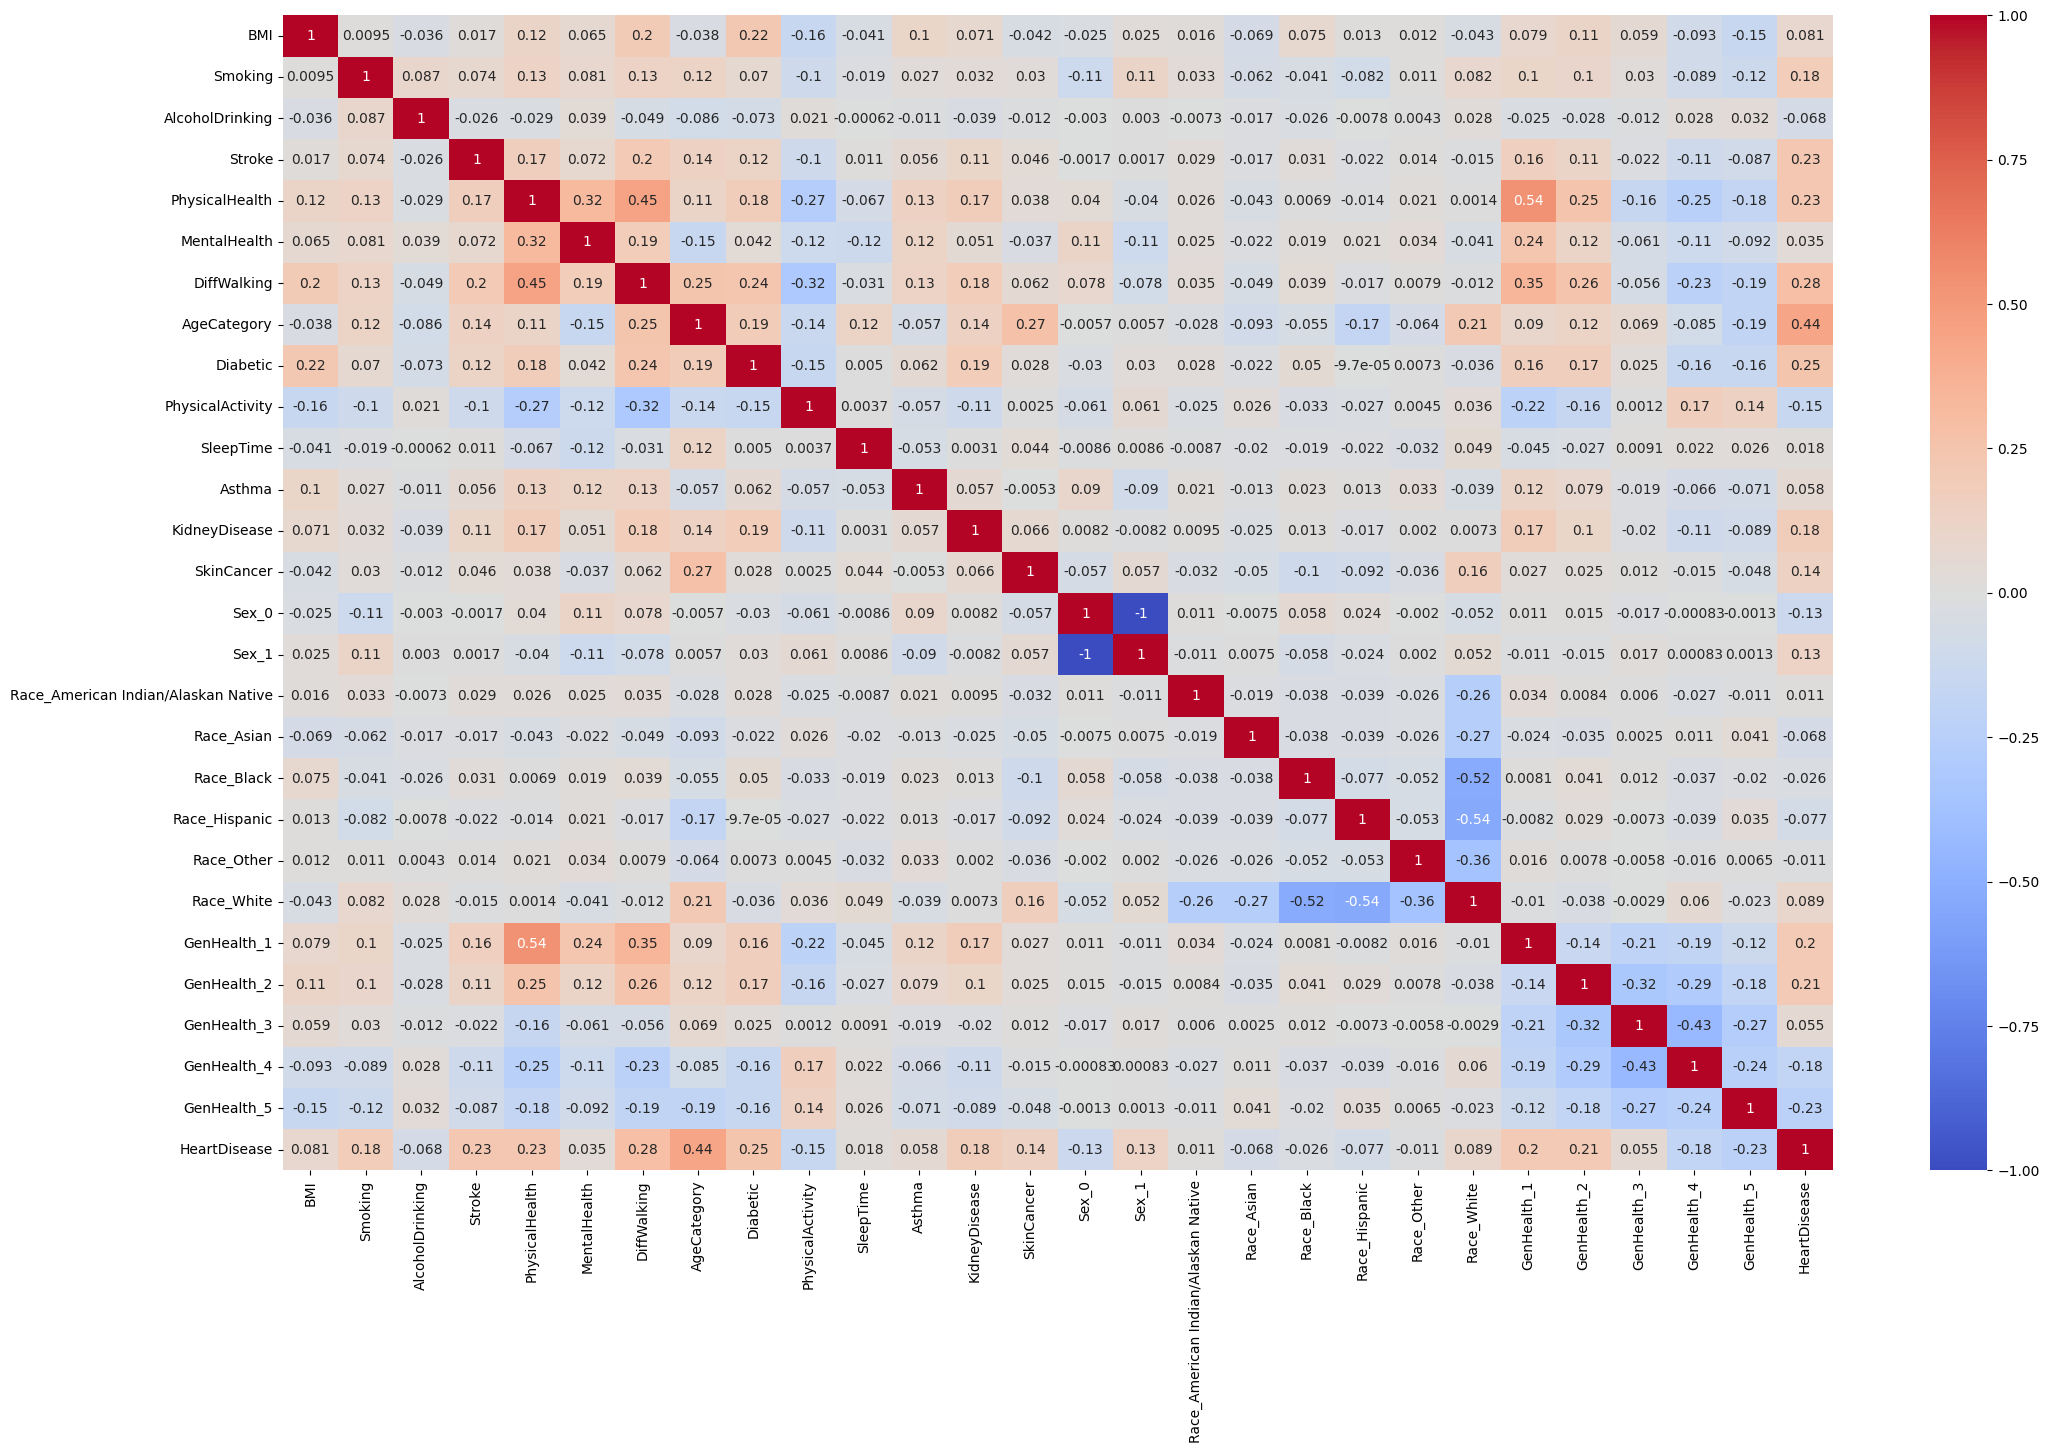

In [18]:
 plt.figure(figsize=(25, 15))
 correlation_matrix = data_set.corr()
 heatmap =sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
 plt.show()

### Remove correlated features and weakly correlated with target

In [19]:
data_set.drop(['SleepTime',"Race_Asian","Race_Hispanic", "Race_Other", "Race_White","Race_Black", "Race_American Indian/Alaskan Native",  "GenHealth_1", "GenHealth_2", "GenHealth_3", "GenHealth_4", "GenHealth_5"],axis="columns", inplace=True)

In [20]:
data_set

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Sex_0,Sex_1,HeartDisease
0,16.60,1,0,0,3.0,30.0,0,57.0,1,1,1,0,1,1,0,0
1,20.34,0,0,1,0.0,0.0,0,85.0,0,1,0,0,0,1,0,0
2,26.58,1,0,0,20.0,30.0,0,67.0,1,1,1,0,0,0,1,0
3,24.21,0,0,0,0.0,0.0,0,77.0,0,0,0,0,1,1,0,0
4,23.71,0,0,0,28.0,0.0,1,42.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548907,34.90,1,0,1,30.0,0.0,1,62.0,1,0,0,0,0,1,0,1
548908,37.97,0,0,0,0.0,0.0,1,62.0,0,1,0,0,1,0,1,1
548909,21.80,1,1,0,0.0,0.0,0,67.0,0,1,0,0,0,1,0,1
548910,22.38,1,0,0,0.0,0.0,0,85.0,1,1,0,0,1,0,1,1


<Axes: title={'center': 'Correlation with target'}>

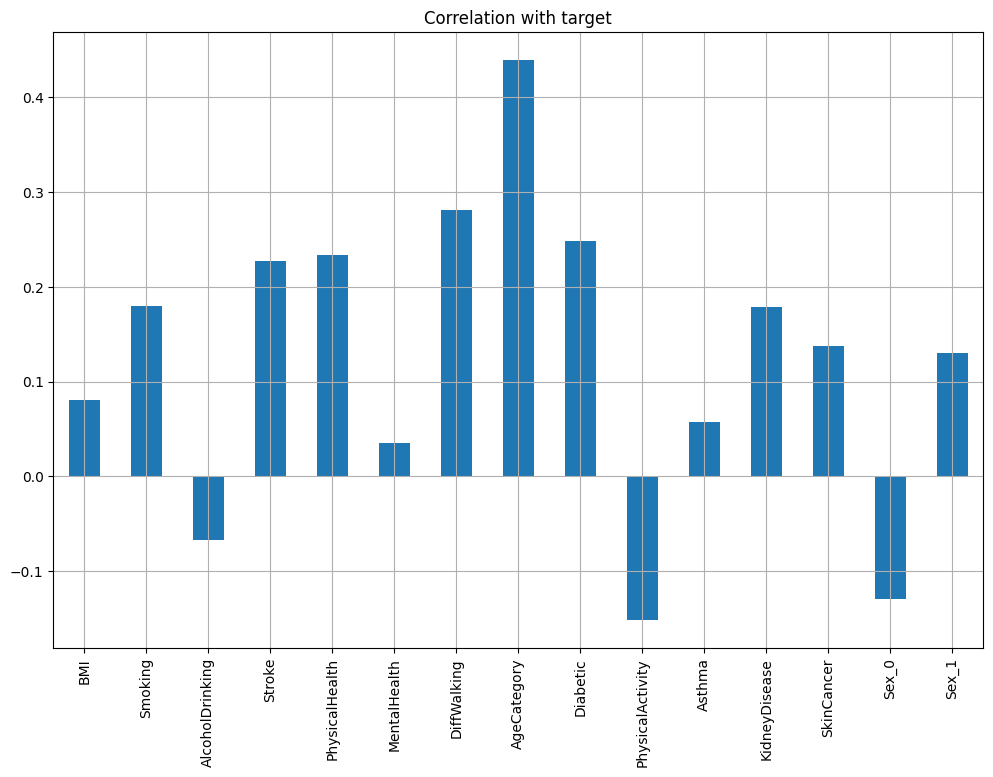

In [21]:
data_set.drop('HeartDisease', axis=1).corrwith(data_set.HeartDisease).plot(kind='bar', grid=True, figsize=(12, 8),
                                                      title="Correlation with target")

## Detect & remove outliers

In [22]:
num_data=[]
for i in data_set.columns:
    if data_set[i].dtype==float :
        num_data.append(i)
print(num_data)

['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory']


BMI                  Axes(0.125,0.11;0.168478x0.77)
PhysicalHealth    Axes(0.327174,0.11;0.168478x0.77)
MentalHealth      Axes(0.529348,0.11;0.168478x0.77)
AgeCategory       Axes(0.731522,0.11;0.168478x0.77)
dtype: object

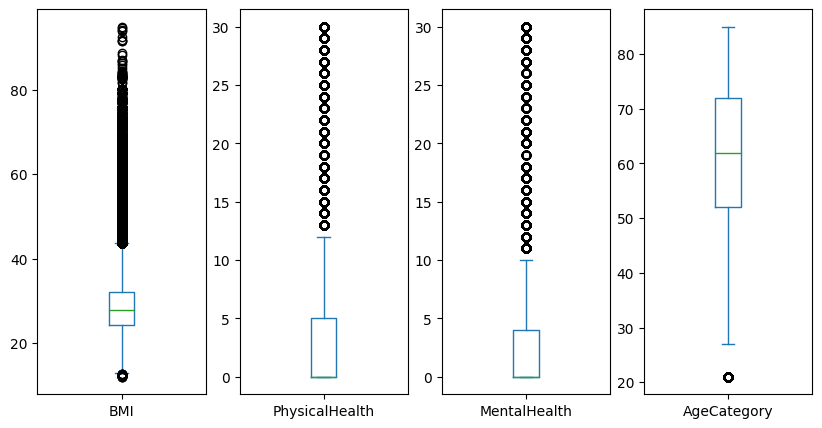

In [23]:
data_set[num_data].plot(kind = "box", figsize = (10,5), subplots = True)

In [24]:
Z_score= zscore(data_set[num_data])
Z_score

,BMI,PhysicalHealth,MentalHealth,AgeCategory
0,-1.877443,-0.248350,2.969513,-0.230191
1,-1.305353,-0.547829,-0.506483,1.363320
2,-0.350850,1.448702,2.969513,0.338920
3,-0.713378,-0.547829,-0.506483,0.908031
4,-0.789860,2.247314,-0.506483,-1.083858
...,...,...,...,...
548907,0.921821,2.446968,-0.506483,0.054364
548908,1.391424,-0.547829,-0.506483,0.054364
548909,-1.082024,-0.547829,-0.506483,0.338920
548910,-0.993304,-0.547829,-0.506483,1.363320


In [25]:
no_outliers = ((Z_score > -3.0) & (Z_score < 3.0)).all(axis=1)
no_outliers

0         True
1         True
2         True
3         True
4         True
          ... 
548907    True
548908    True
548909    True
548910    True
548911    True
Length: 548912, dtype: bool

##### Values between -3 and 3 in z_score

In [26]:
clean_data_set =data_set[no_outliers]
clean_data_set

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Sex_0,Sex_1,HeartDisease
0,16.60,1,0,0,3.0,30.0,0,57.0,1,1,1,0,1,1,0,0
1,20.34,0,0,1,0.0,0.0,0,85.0,0,1,0,0,0,1,0,0
2,26.58,1,0,0,20.0,30.0,0,67.0,1,1,1,0,0,0,1,0
3,24.21,0,0,0,0.0,0.0,0,77.0,0,0,0,0,1,1,0,0
4,23.71,0,0,0,28.0,0.0,1,42.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548907,34.90,1,0,1,30.0,0.0,1,62.0,1,0,0,0,0,1,0,1
548908,37.97,0,0,0,0.0,0.0,1,62.0,0,1,0,0,1,0,1,1
548909,21.80,1,1,0,0.0,0.0,0,67.0,0,1,0,0,0,1,0,1
548910,22.38,1,0,0,0.0,0.0,0,85.0,1,1,0,0,1,0,1,1


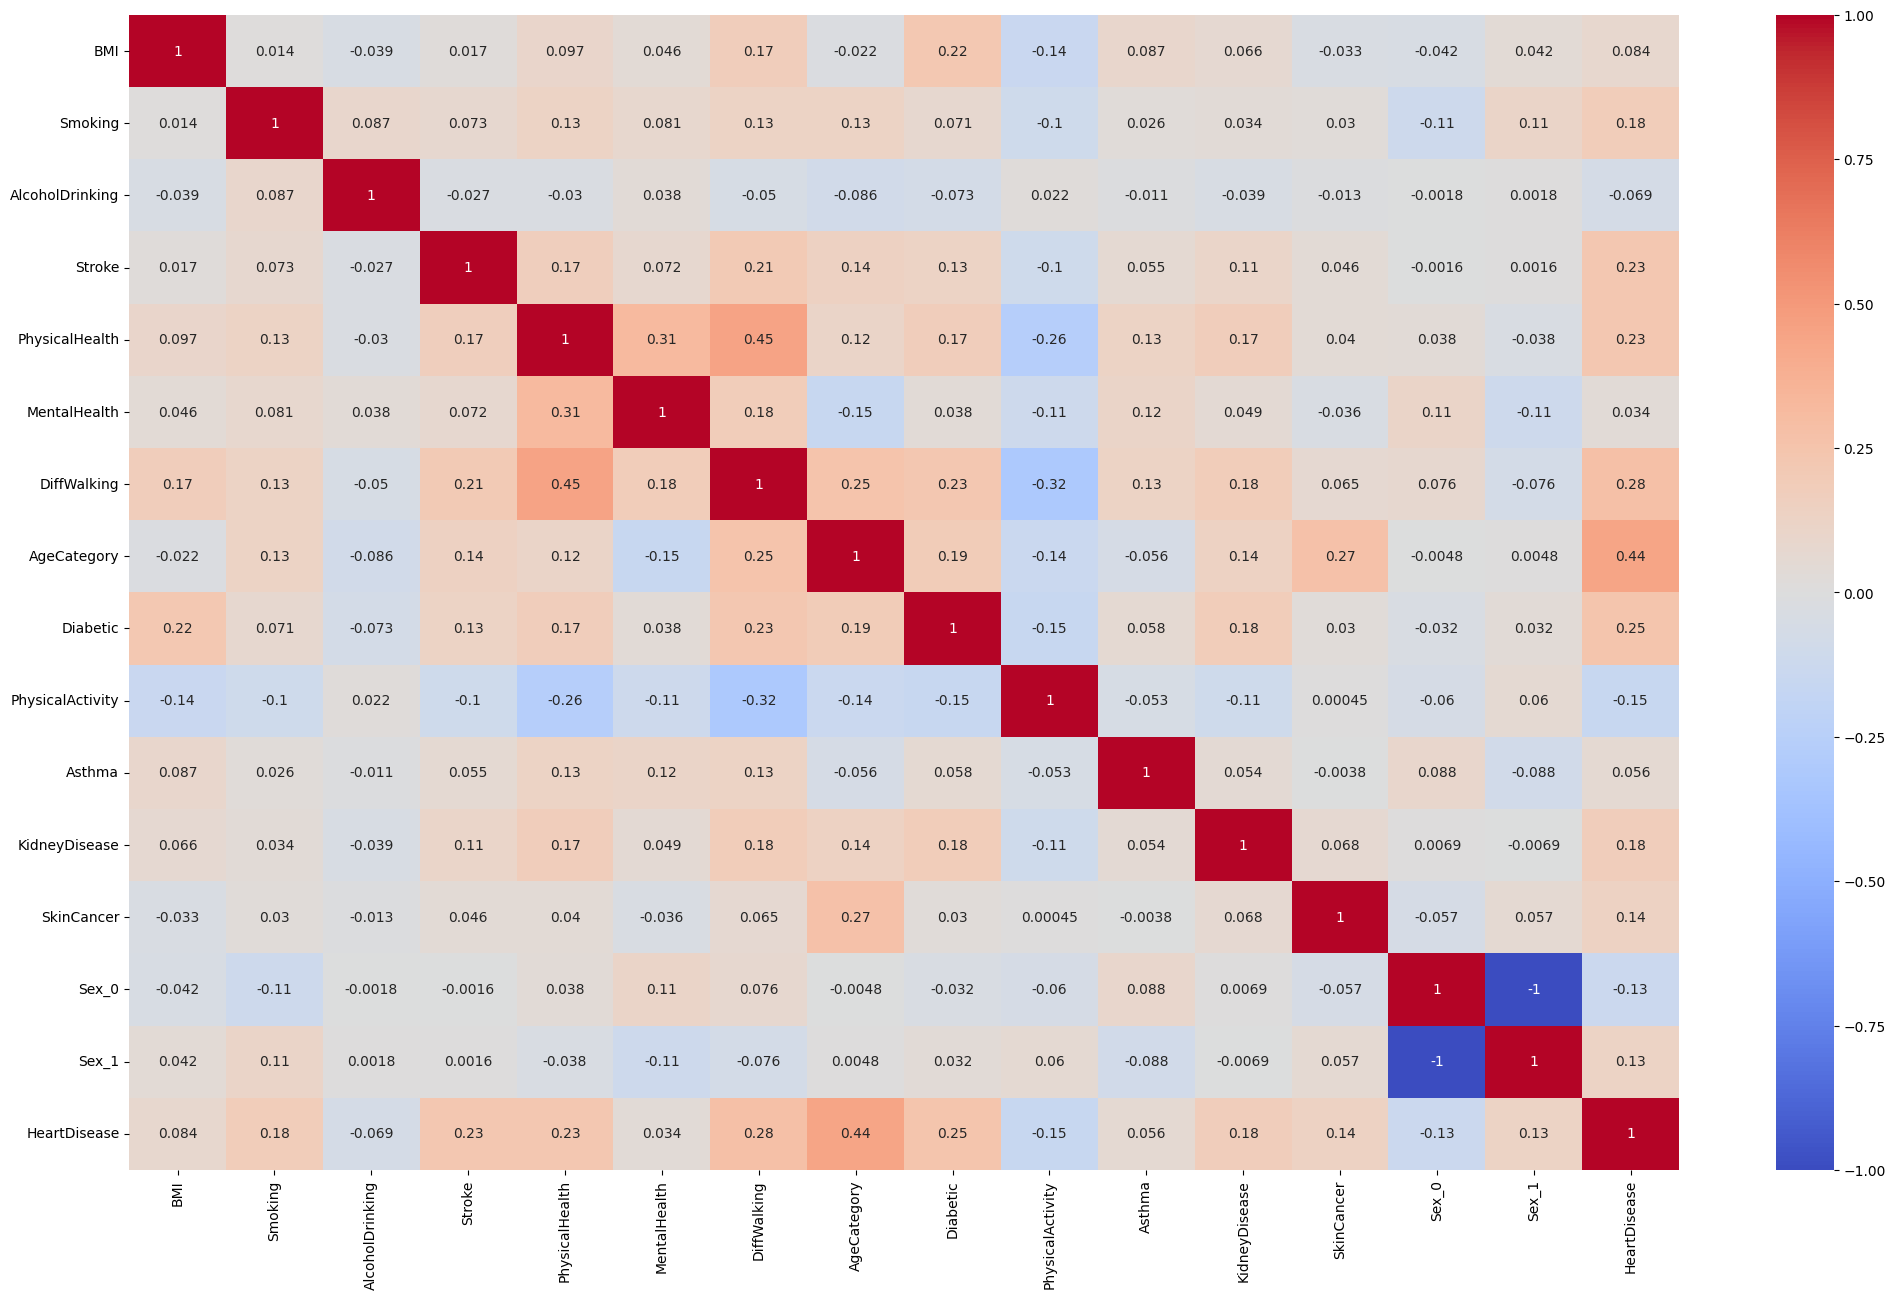

In [27]:
 plt.figure(figsize=(25, 15))
 correlation_matrix = clean_data_set.corr()
 heatmap =sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
 plt.show()

In [28]:
number_of_outliers=data_set.shape[0]-clean_data_set.shape[0]
number_of_outliers

6615

In [29]:
ratio_of_outliers=number_of_outliers/data_set.shape[0]
print(round(ratio_of_outliers*100,1))

1.2


## feature scaling

In [30]:
clean_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542297 entries, 0 to 548911
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               542297 non-null  float64
 1   Smoking           542297 non-null  int64  
 2   AlcoholDrinking   542297 non-null  int64  
 3   Stroke            542297 non-null  int64  
 4   PhysicalHealth    542297 non-null  float64
 5   MentalHealth      542297 non-null  float64
 6   DiffWalking       542297 non-null  int64  
 7   AgeCategory       542297 non-null  float64
 8   Diabetic          542297 non-null  int64  
 9   PhysicalActivity  542297 non-null  int64  
 10  Asthma            542297 non-null  int64  
 11  KidneyDisease     542297 non-null  int64  
 12  SkinCancer        542297 non-null  int64  
 13  Sex_0             542297 non-null  int64  
 14  Sex_1             542297 non-null  int64  
 15  HeartDisease      542297 non-null  int64  
dtypes: float64(4), int64(12)


In [31]:
MM = MinMaxScaler()

scaled_data = clean_data_set.copy()
float_columns = scaled_data.select_dtypes(include=['float64']).columns

scaled_data[float_columns] = MM.fit_transform(scaled_data[float_columns])

In [32]:
clean_data_set=scaled_data
clean_data_set

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Sex_0,Sex_1,HeartDisease
0,0.125652,1,0,0,0.100000,1.0,0,0.562500,1,1,1,0,1,1,0,0
1,0.228258,0,0,1,0.000000,0.0,0,1.000000,0,1,0,0,0,1,0,0
2,0.399451,1,0,0,0.666667,1.0,0,0.718750,1,1,1,0,0,0,1,0
3,0.334431,0,0,0,0.000000,0.0,0,0.875000,0,0,0,0,1,1,0,0
4,0.320713,0,0,0,0.933333,0.0,1,0.328125,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548907,0.627709,1,0,1,1.000000,0.0,1,0.640625,1,0,0,0,0,1,0,1
548908,0.711934,0,0,0,0.000000,0.0,1,0.640625,0,1,0,0,1,0,1,1
548909,0.268313,1,1,0,0.000000,0.0,0,0.718750,0,1,0,0,0,1,0,1
548910,0.284225,1,0,0,0.000000,0.0,0,1.000000,1,1,0,0,1,0,1,1


## Visualization

([<matplotlib.patches.Wedge at 0x160ea8b1ee0>,
 [Text(0.002666908749151992, 1.0999967670851236, 'diseased'),
  Text(-0.002667011738282143, -1.099996766835425, 'well')])

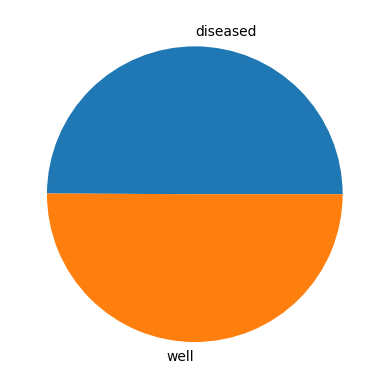

In [33]:
dis = np.sum(clean_data_set['HeartDisease'])
plt.pie([dis, len(clean_data_set['HeartDisease']) - dis], labels=['diseased', 'well'])

In [34]:
diseased = [i == 1 for i in clean_data_set['HeartDisease']] 
def clac_num_disesed_well(col):
    feature = [j == 1 for j in clean_data_set[col]]
    diseasedn = 0
    well = 0
    for i in range(len(diseased)):
        if feature[i] == True and diseased[i] == True:
            diseasedn += 1
        elif feature[i] == True and diseased[i] == False:
            well += 1
    return diseasedn, well

<BarContainer object of 4 artists>

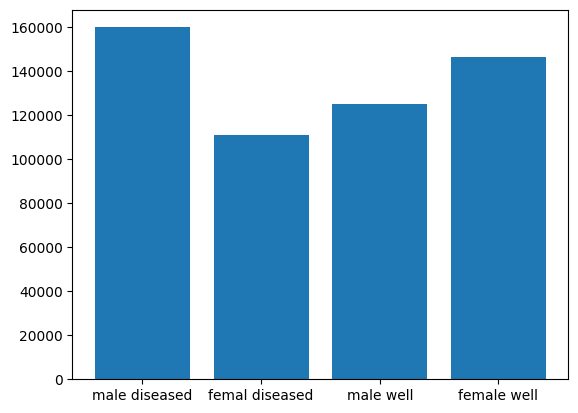

In [35]:
# male = [j == 1 for j in clean_data_set['Sex_Male']]
male_diseased,male_well = clac_num_disesed_well('Sex_1')
female_diseased, female_well  = clac_num_disesed_well('Sex_0')
y_axis = [male_diseased, female_diseased, male_well, female_well]
# y_axis = clac_num_disesed_well('Sex_Male').append(clac_num_disesed_well('Sex_Female'))
x_axis = ['male diseased', 'femal diseased', 'male well', 'female well']
plt.bar(x_axis,y_axis)

In [36]:
def plot_pie(col):
    diseasedn,well = clac_num_disesed_well(col)
    plt.pie([diseasedn,well], labels = [f"{col} diseased", f"{col} well"])

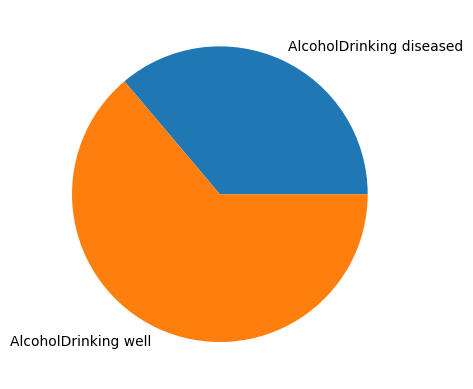

In [37]:
plot_pie('AlcoholDrinking')

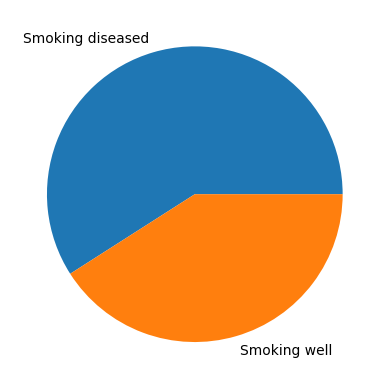

In [38]:
plot_pie('Smoking')

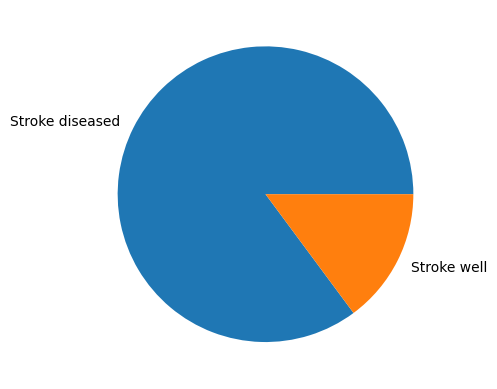

In [39]:
plot_pie('Stroke')

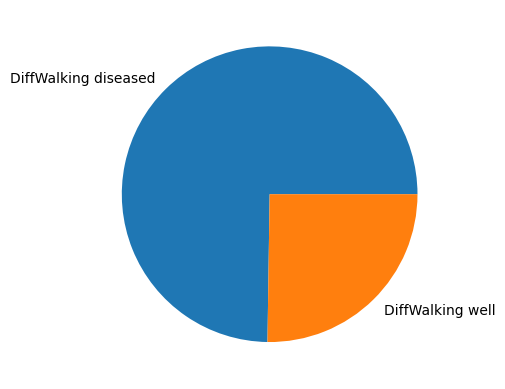

In [40]:
plot_pie('DiffWalking')

In [41]:
x = clean_data_set.drop("HeartDisease", axis=1)
y = clean_data_set["HeartDisease"]

In [42]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

In [43]:
# from sklearn.metrics import classification_report
# clf = LogisticRegression().fit(x_train, y_train)
# predictions = clf.predict(x_train)
# print(classification_report(y_train, predictions))

In [44]:
# model = LogisticRegression()
# model = model.fit(x_train, y_train)
# test_pred = model.predict(x_train)
# test_acc = accuracy_score(y_train, test_pred)
# test_acc

In [45]:
# valid_pred = model.predict(x_valid)
# valid_acc = accuracy_score(y_valid, valid_pred)
# valid_acc

In [46]:
# model = GaussianNB()
# model.fit(x_train, y_train)
# test_pred = model.predict(x_train)
# test_acc = accuracy_score(y_train, test_pred)
# test_acc

In [47]:
# valid_pred = model.predict(x_valid)
# valid_acc = accuracy_score(y_valid, valid_pred)
# valid_acc

In [48]:
# degree = 3
# poly = PolynomialFeatures(degree=degree)
# train_data_poly = poly.fit_transform(x_train)
# valid_data_poly = poly.transform(x_valid)
# test_data_poly = poly.transform(x_test)

# model = LogisticRegression()
# model.fit(train_data_poly, y_train)

# test_pred = model.predict(train_data_poly)  # Predict on the test data, not train data
# test_acc = accuracy_score(test_pred, y_train)  # Compare with test labels, not train labels

# print("Train Accuracy:", test_acc)

## Hyper parameter tuning

In [49]:
# max_depth = np.linspace(1, 50, 50, dtype='int64')
# accuracy_train, accuracy_test = [], []

# for i in max_depth:
#     clf_dt = tree.DecisionTreeClassifier(max_depth=i, random_state=12345)
#     clf_dt.fit(x_train, y_train)
#     y_train_pred = clf_dt.predict(x_train)
#     y_test_pred = clf_dt.predict(x_test)
    
#     accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
#     accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))

# fig, ax = plt.subplots(figsize=(12, 12))
# plt.plot(max_depth, accuracy_train, label='Training', marker='o')
# plt.plot(max_depth, accuracy_test, label='Testing', marker='o')
# plt.ylabel('Accuracy')
# plt.xlabel('Tree depth')
# plt.legend(loc='lower right', borderpad=0, handletextpad=0) 

# plt.xticks(max_depth)
# plt.grid(True)

# plt.show()

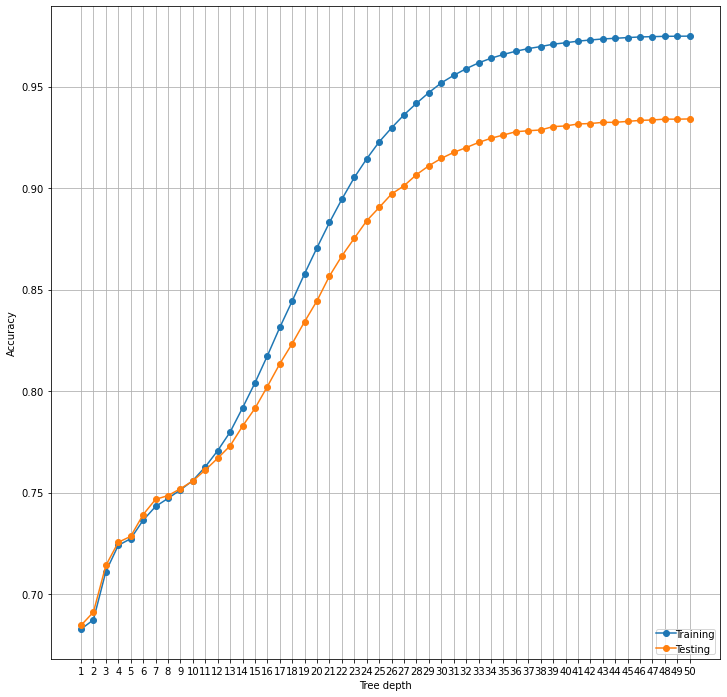

In [50]:
# min_samples_split = np.linspace(2, 35, 35,dtype='int64')
# accuracy_train,accuracy_test=[],[]

# for i in min_samples_split:
#     clf_dt=tree.DecisionTreeClassifier(min_samples_split=i, random_state=12345)
#     clf_dt.fit(x_train,y_train)
#     y_train_pred = clf_dt.predict(x_train)
#     y_test_pred = clf_dt.predict(x_test)
    
#     accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
#     accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))

# ax= plt.figure(figsize=(12, 12))
# plt.plot(min_samples_split,accuracy_train)
# plt.plot(min_samples_split,accuracy_test)
# plt.ylabel('Accuracy')
# plt.xlabel('min_samples_splits')
# plt.legend(['Training', 'Testing'],loc='upper right', borderpad=0, handletextpad=0) 

# plt.xticks(np.arange(0.0, 40.0, 5))
# plt.grid(True)

# plt.show()

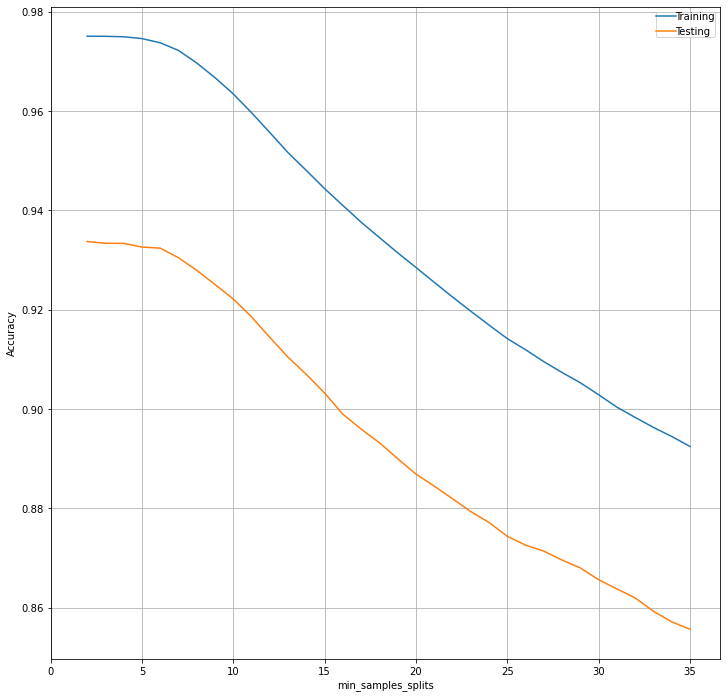

In [51]:
# min_samples_leaf = np.linspace(1, 50, 50,dtype='int64')
# accuracy_train,accuracy_test=[],[]

# for i in min_samples_leaf:
#     clf_dt=tree.DecisionTreeClassifier(min_samples_leaf=i, random_state=12345)
#     clf_dt.fit(x_train,y_train)
#     y_train_pred = clf_dt.predict(x_train)
#     y_test_pred = clf_dt.predict(x_test)
    
#     accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
#     accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))

# ax= plt.figure(figsize=(12, 12))
# plt.plot(min_samples_leaf,accuracy_train)
# plt.plot(min_samples_leaf,accuracy_test)
# plt.ylabel('Accuracy')
# plt.xlabel('min_samples_leaf')
# plt.legend(['Training', 'Testing'],loc='upper right', borderpad=0, handletextpad=0) 

# plt.xticks(min_samples_leaf)
# plt.grid(True)

# plt.show()

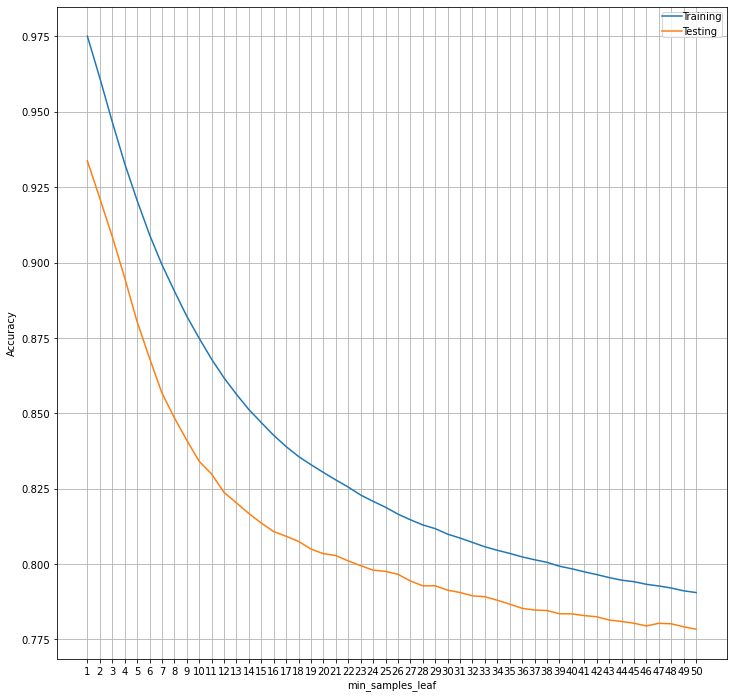

In [52]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
test_pred = model.predict(x_train)
test_acc = accuracy_score(y_train, test_pred)
print(test_acc)

0.9750851126114186


In [53]:
valid_pred = model.predict(x_valid)
valid_acc = accuracy_score(y_valid, valid_pred)
valid_acc

0.933339479992624

In [54]:
final_pred = model.predict(x_test)
final_acc = accuracy_score(y_test, final_pred)
final_acc

0.9335054397934722

In [55]:
# n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
# accuracy_train, accuracy_test = [], []

# for i in n_estimators:
#     clf_rf = RandomForestClassifier(n_estimators=i, random_state=12345)
#     clf_rf.fit(x_train, y_train)
#     y_train_pred = clf_rf.predict(x_train)
#     y_test_pred = clf_rf.predict(x_test)

#     accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
#     accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))

# plt.figure(figsize=(12, 12))
# plt.plot(n_estimators, accuracy_train, marker='o')
# plt.plot(n_estimators, accuracy_test, marker='o')
# plt.ylabel('Accuracy')
# plt.xlabel('n_estimators')
# plt.legend(['Training', 'Testing'], loc='upper right', borderpad=0, handletextpad=0)

# plt.xticks(n_estimators)
# plt.grid(True)
# plt.show()

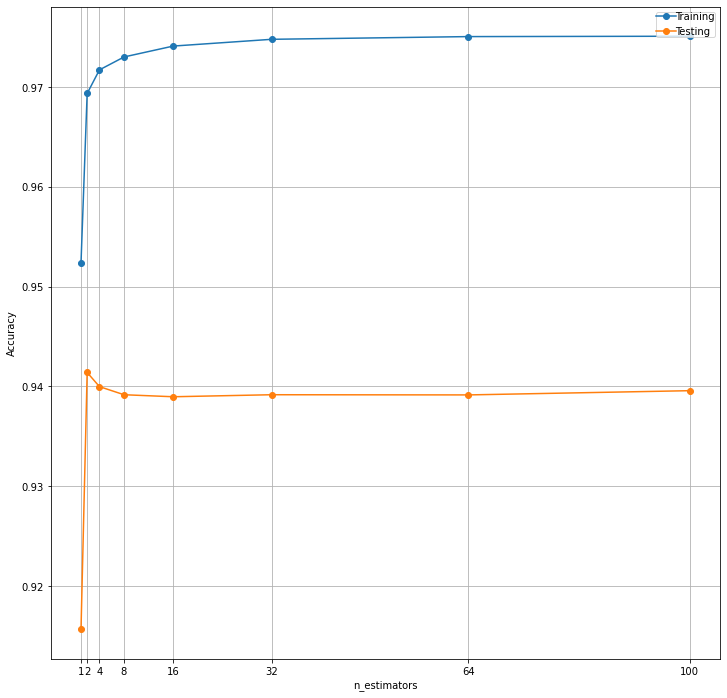

In [56]:
model2 = RandomForestClassifier(n_estimators=4)
model2.fit(x_train, y_train)
test_pred = model2.predict(x_train)
test_acc = accuracy_score(y_train, test_pred)
test_acc

0.9716460329570783

In [57]:
valid_pred = model2.predict(x_valid)
valid_acc = accuracy_score(y_valid, valid_pred)
valid_acc

0.9398303522035774

In [58]:
import joblib  


In [59]:
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [60]:
saved = joblib.load("finalized_model.sav")

In [61]:
clean_data_set

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Sex_0,Sex_1,HeartDisease
0,0.125652,1,0,0,0.100000,1.0,0,0.562500,1,1,1,0,1,1,0,0
1,0.228258,0,0,1,0.000000,0.0,0,1.000000,0,1,0,0,0,1,0,0
2,0.399451,1,0,0,0.666667,1.0,0,0.718750,1,1,1,0,0,0,1,0
3,0.334431,0,0,0,0.000000,0.0,0,0.875000,0,0,0,0,1,1,0,0
4,0.320713,0,0,0,0.933333,0.0,1,0.328125,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548907,0.627709,1,0,1,1.000000,0.0,1,0.640625,1,0,0,0,0,1,0,1
548908,0.711934,0,0,0,0.000000,0.0,1,0.640625,0,1,0,0,1,0,1,1
548909,0.268313,1,1,0,0.000000,0.0,0,0.718750,0,1,0,0,0,1,0,1
548910,0.284225,1,0,0,0.000000,0.0,0,1.000000,1,1,0,0,1,0,1,1


In [62]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import joblib

class PredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Machine Learning Prediction")

        self.label = ttk.Label(root, text="Answer a few questions:")
        self.label.pack(padx=10, pady=10)

        self.questions = [
            "Question 1: Do you smoke?",
            "Question 2: Do you drink alcohol?",
            "Question 3: Have you ever experienced a stroke?",
            "Question 4: Do you have difficulty walking?",
            "Question 5: Are you diabetic?",
            "Question 6: Are you physically active?",
            "Question 7: Do you have Asthma?",
            "Question 8: Do you have Kidney disease?",
            "Question 9: Do you have skin cancer?",
            "Question 10: Standardized BMI (0-1)",
            "Question 11: Standardized PhysicalHealth (0-1)",
            "Question 12: Standardized MentalHealth (0-1)",
            "Question 13: What is your Age?",
            "Male (0-1)",
            "Female (0-1)"
        ]
        
        self.answers = []
        for q in self.questions:
            label = ttk.Label(root, text=q)
            label.pack(padx=10, pady=5)
            entry = ttk.Entry(root)
            entry.pack(padx=10, pady=5)
            self.answers.append(entry)

        self.predict_button = ttk.Button(root, text="Predict", command=self.predict)
        self.predict_button.pack(padx=10, pady=10)

        self.model = joblib.load("finalized_model.sav")

    def predict(self):
        try:
            input_values = [
                1 if entry.get().lower() == "yes" else 0
                if idx < 9 else float(entry.get())
                for idx, entry in enumerate(self.answers[:9])
            ]
            
            # Extract standardized values for questions 10 to 12
            standardized_values = [float(entry.get()) for entry in self.answers[9:12]]

            # Add standardized values and gender columns
            input_values.extend(standardized_values)
            input_values.extend([int(entry.get()) for entry in self.answers[12:]])

            prediction = self.model.predict([input_values])[0]

            messagebox.showinfo("Prediction Result", f"The prediction is: {prediction}")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

if __name__ == "__main__":
    root = tk.Tk()
    app = PredictionApp(root)
    root.mainloop()
